In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn.metrics import cohen_kappa_score, recall_score,precision_score,f1_score,roc_curve,roc_auc_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import scipy.stats as stats
from statsmodels.stats import weightstats as stest
from imblearn.over_sampling import SMOTE

In [280]:
plt.rcParams['figure.figsize'] = [15,8]

### 1. Read the dataset and view the first 10 rows of it

In [281]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### 2. Check the shape/dimension of the dataset

In [282]:
df.shape

(5110, 12)

In [283]:
print(f'Dataset has {df.shape[0]} rows')
print(f'Dataset has {df.shape[1]} columns')

Dataset has 5110 rows
Dataset has 12 columns


### 3. Check for the missing values.Display number of missing values per column.

In [284]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### 4. Investigate and predict the missing BMI Value.

In [285]:
# There are 201 missing values in the BMI

In [286]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

### 5. Check the datatype, number of non null values and name of each variable in the dataset.

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 6. Check the descriptive statistics of the dataset.

In [288]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


### 7. Visualize the proportion of Stroke samples in the dataset.

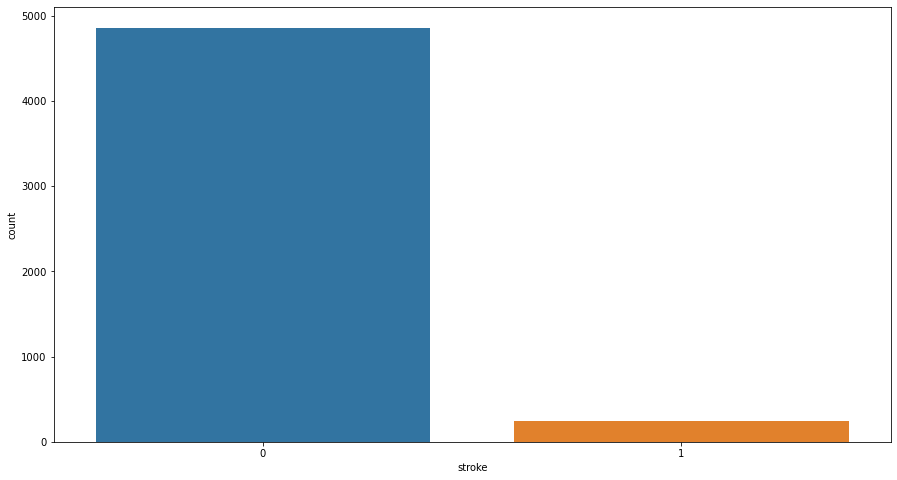

In [289]:
sns.countplot(df['stroke'])
plt.show()

### 8. Visualize the Distribution of Male and Female Ages. Write the Observation.

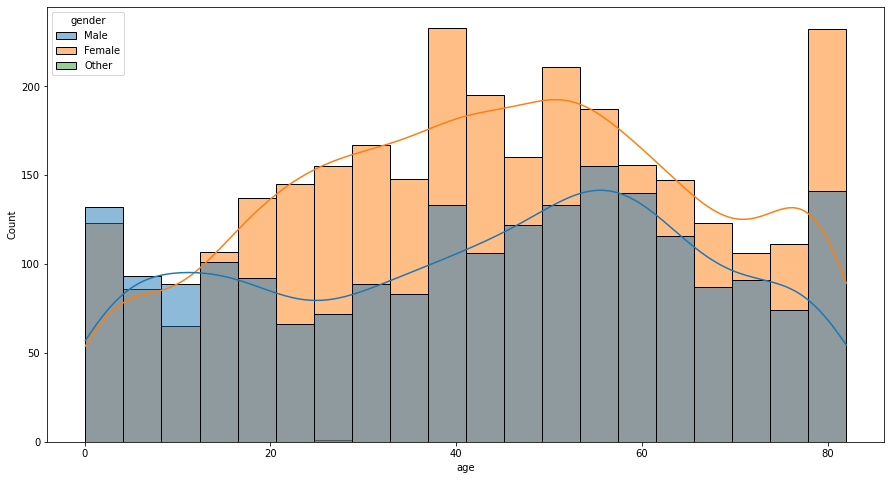

In [290]:
sns.histplot(data=df, x = 'age',hue='gender',kde=True)
plt.show()

* Female distribution is more than male distribution

### 10.Visualize the stroke sample based on 
* **BMI and Glucose Level**
* **BMI and Age**

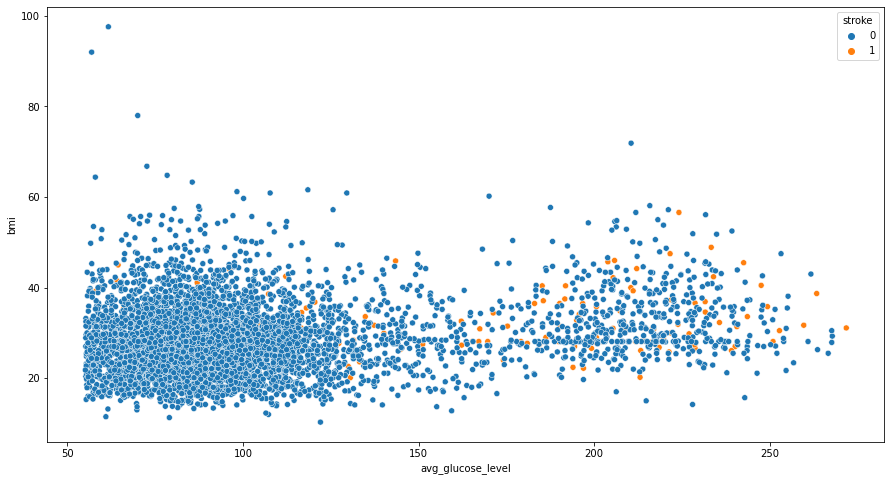

In [291]:
# bmi vs glucose level
sns.scatterplot(x = df['avg_glucose_level'], y = df['bmi'],hue=df['stroke'])
plt.show()

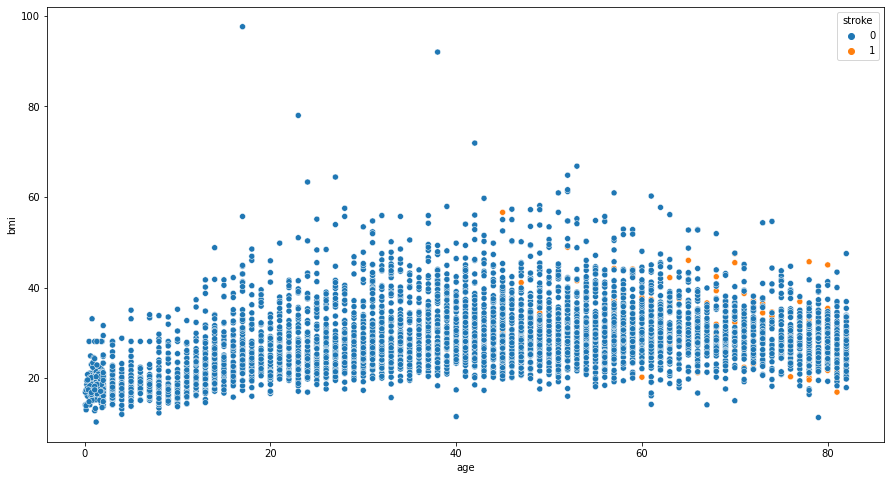

In [292]:
# bmi vs age
sns.scatterplot(x = df['age'], y = df['bmi'],hue=df['stroke'])
plt.show()

### 11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population.

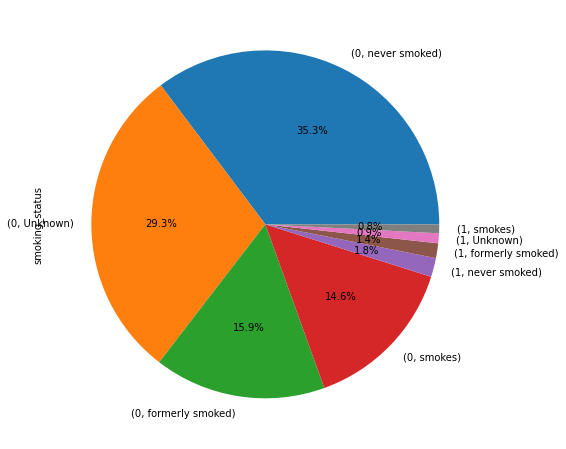

In [293]:
df.groupby('stroke')['smoking_status'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

### 12. Perform hypothesis testing to find the significant variables.

**Z-test**

In [294]:
cols = ['age','avg_glucose_level', 'bmi']

In [295]:
for i in cols:
    print('Hypothesis Testing for',i)
    X1 = df[df['stroke']==0][i]
    X2 = df[df['stroke']==1][i]
    z_statistic, pvalue = stest.ztest(x1 = X1,x2 = X2)
    print(f'z_statistic: {z_statistic}, pvalue:{pvalue}\n\n')

Hypothesis Testing for age
z_statistic: -18.08083426887953, pvalue:4.512034549927382e-73


Hypothesis Testing for avg_glucose_level
z_statistic: -9.513352175431471, pvalue:1.8461548402658107e-21


Hypothesis Testing for bmi
z_statistic: -2.5824731791682565, pvalue:0.009809498659843801




**Chi2 contingency test**

In [296]:
cols = [ 'gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status']

In [297]:
for i in cols:
    print('Hypothesis Testing for',i)
    obs_table = pd.crosstab(df['stroke'],df[i])
    observed_values = obs_table.values
    statistic,pvalue,dof,expected_value = stats.chi2_contingency(observed_values)
    print(f'statistic: {z_statistic}, pvalue:{pvalue}\n\n')

Hypothesis Testing for gender
statistic: -2.5824731791682565, pvalue:0.7895490538408245


Hypothesis Testing for hypertension
statistic: -2.5824731791682565, pvalue:1.661621901511823e-19


Hypothesis Testing for heart_disease
statistic: -2.5824731791682565, pvalue:2.0887845685229236e-21


Hypothesis Testing for ever_married
statistic: -2.5824731791682565, pvalue:1.6389021142314745e-14


Hypothesis Testing for work_type
statistic: -2.5824731791682565, pvalue:5.397707801896119e-10


Hypothesis Testing for Residence_type
statistic: -2.5824731791682565, pvalue:0.29833169286876987


Hypothesis Testing for smoking_status
statistic: -2.5824731791682565, pvalue:2.0853997025008455e-06




### 13. Drop the unnecessary columns.

In [298]:
df.drop(['id','gender','Residence_type'],axis=1,inplace=True)

In [299]:
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
1,61.0,0,0,Yes,Self-employed,202.21,28.1,never smoked,1
2,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
3,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
4,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1


### 14. Write the code to replace following categories columns in integer format as follow –
* a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
* b) ever_married('Yes': 1, 'No': 0)
* c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [300]:
dict_work_type = {'Private':0,'Self-employed':1,'Govt_job':2,'children':1,'Never_worked':-2}

In [301]:
df['work_type'] = df['work_type'].map(dict_work_type)

In [302]:
df['ever_married'] = df['ever_married'].apply(lambda x: 0 if x == 'No' else 1)

In [303]:
dict_smoking = {'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}

In [304]:
df['smoking_status'] = df['smoking_status'].map(dict_smoking)

In [305]:
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,0,228.69,36.6,2,1
1,61.0,0,0,1,1,202.21,28.1,0,1
2,80.0,0,1,1,0,105.92,32.5,0,1
3,49.0,0,0,1,0,171.23,34.4,-1,1
4,79.0,1,0,1,1,174.12,24.0,0,1


### 15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.

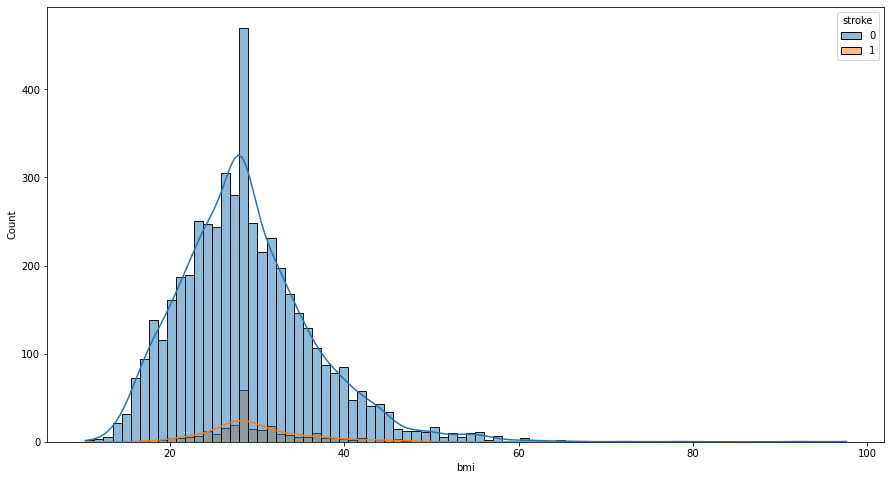

In [306]:
sns.histplot(data = df ,x = 'bmi',hue='stroke',kde = True)
plt.show()

### 16. List down columns that are highly skewed.

In [307]:
cols = ['age','avg_glucose_level','bmi']
for i in cols:
    print(i,':-',df[i].skew())

age :- -0.1370593225984694
avg_glucose_level :- 1.5722838665030459
bmi :- 1.0881872326442346


### 17. List down the columns that are highly kurtosis.

In [308]:
cols = ['age','avg_glucose_level','bmi']
for i in cols:
    print(i,':-',df[i].kurt())

age :- -0.9910102432016696
avg_glucose_level :- 1.6804785404038278
bmi :- 3.6353059799580927


### 18. Find the distribution of all variables with respect to the outcome 'stroke' variable.

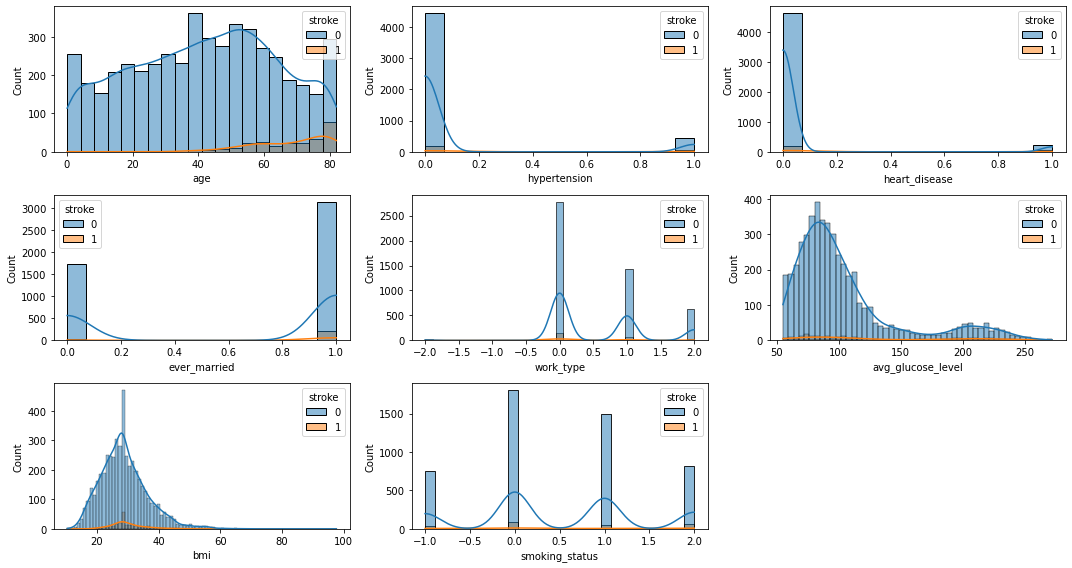

In [309]:
iteration = 1
for i in df.drop('stroke',axis=1).columns:
    plt.subplot(3,3,iteration)
    sns.histplot(data = df ,x = i,hue='stroke',kde = True)
    iteration+=1
plt.tight_layout()
plt.show()

### 19. Plot the heatmap for correlation matrix for the given dataset. Write the observation. Especially note down columns that are highly correlated (Positive or negative correlation,consider 0.7 to 1 as high)

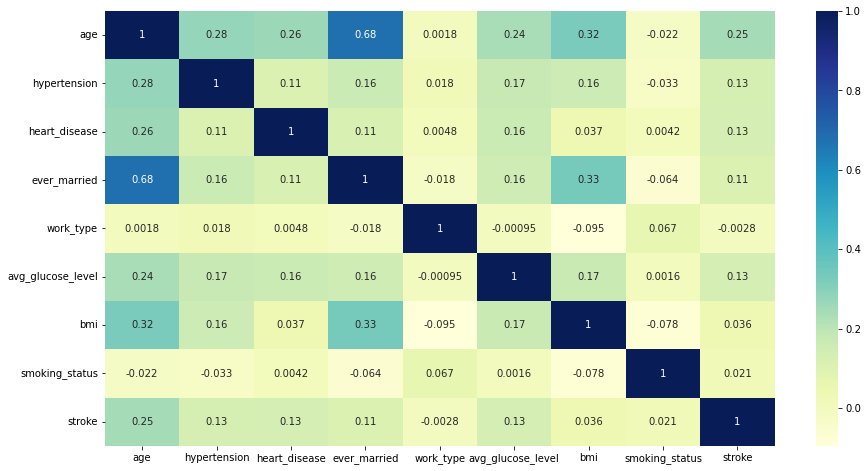

In [310]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

### 20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.

In [311]:
X = df.drop('stroke',axis=1)
y = df['stroke']
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.30,random_state=10)
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(3577, 8)
(3577,)
(1533, 8)
(1533,)


### 21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique.

In [312]:
df.stroke.value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [313]:
# Dataset is imbalanced

In [314]:
sm = SMOTE()
X,y = sm.fit_resample(X,y)

In [315]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.30,random_state=10)

### 22. Model Selection/hyperparameter tuning
- Try different models and fine tune their performance until you get the desired level of
performance on the given dataset.
Model Evaluation
- Evaluate the models using appropriate evaluation metrics.

In [316]:
def metrics(ytest,y_pred,model):
    print('The metrics for the model:',model)
    print('')
    print('Accuracy Score:',accuracy_score(ytest,y_pred))
    print('Recall Score:',recall_score(ytest,y_pred))
    print('Precision Score:',precision_score(ytest,y_pred))
    print('F1 Score:',f1_score(ytest,y_pred))
    print('Kappa Score:',cohen_kappa_score(ytest,y_pred))
    print('')
    print('Classification Report:')
    print(classification_report(ytest,y_pred))

In [317]:
def plot_confunsion_matrix(model,Xtest,ytest):
    y_pred = model.predict(Xtest)
    ConfusionMatrixDisplay.from_predictions(ytest,y_pred,cmap='Blues')
    plt.show()

In [318]:
def plot_roc_curve(model,Xtest,ytest):
    fpr,tpr,threshold = roc_curve(ytest,y_pred)
    plt.plot(fpr,tpr,label = 'ROC_AUC_SCORE:'+' '+str(roc_auc_score(ytest,y_pred)))
    plt.plot([0,1],[0,1],'r--')
    plt.legend()
    plt.show()

In [319]:
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree Classifier': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Naive Bayes': GaussianNB(),
          'Ada Boost': AdaBoostClassifier(),
          'KNN': KNeighborsClassifier(),
          'XG Boost': XGBClassifier()}

Logistic Regression


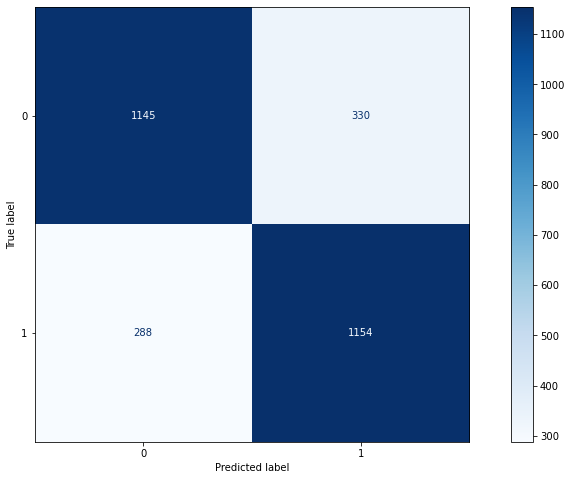

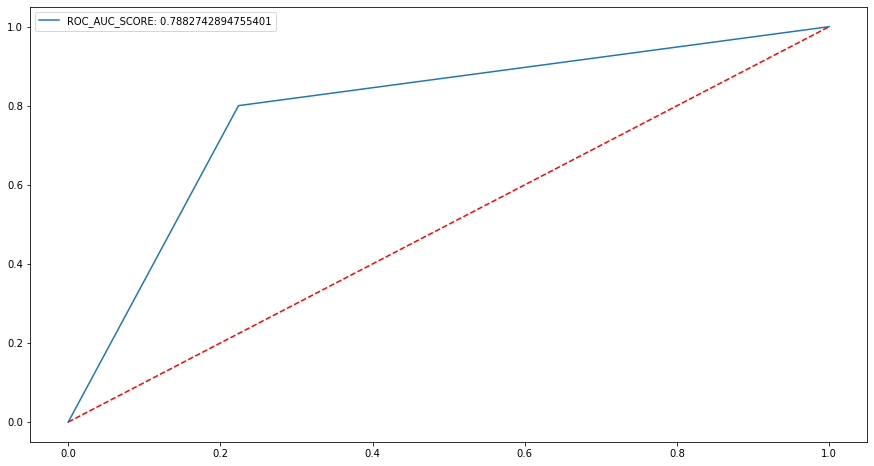

Decision Tree Classifier


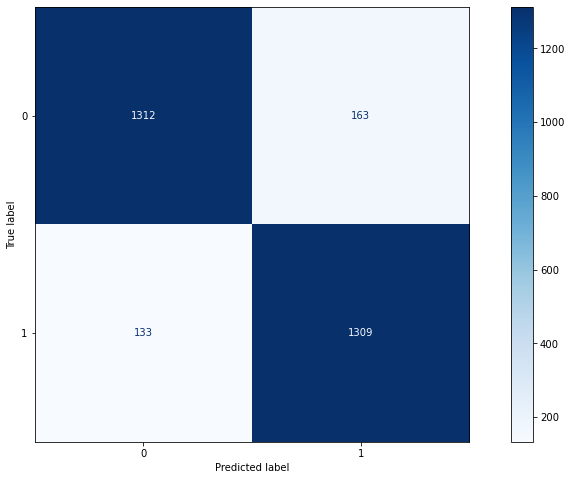

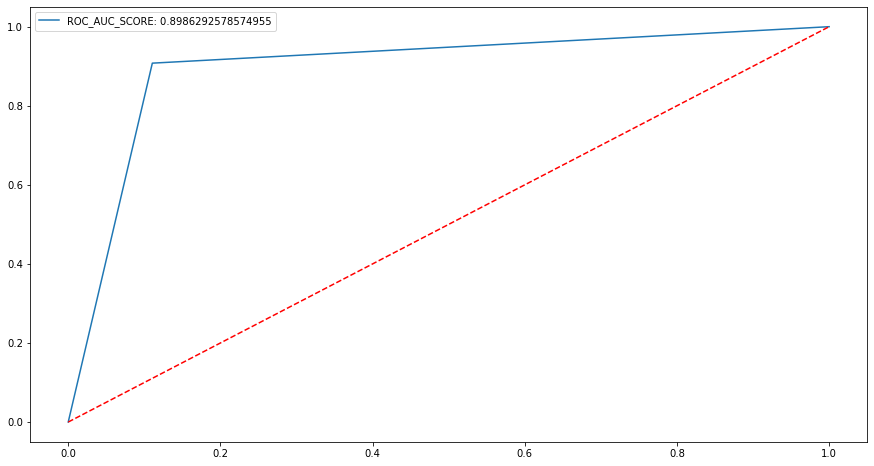

Random Forest


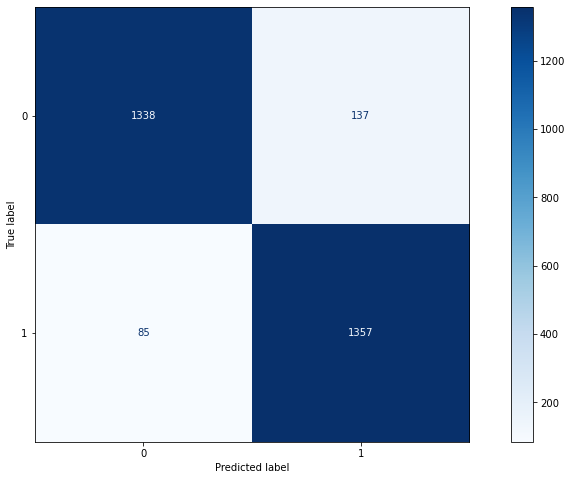

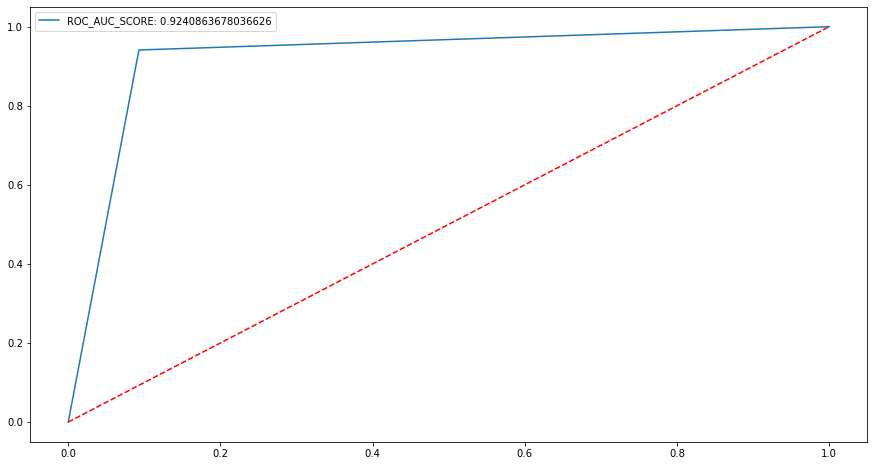

Naive Bayes


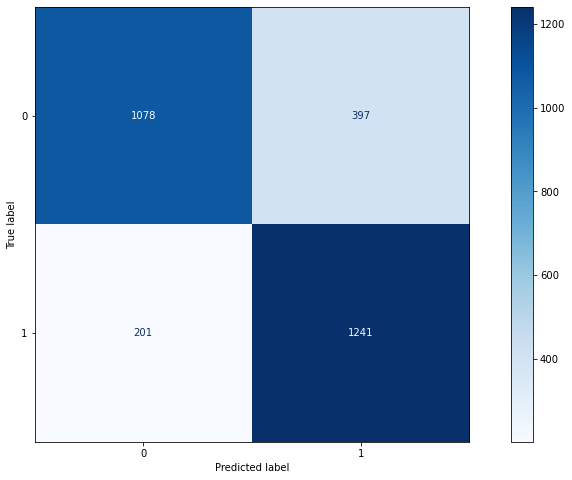

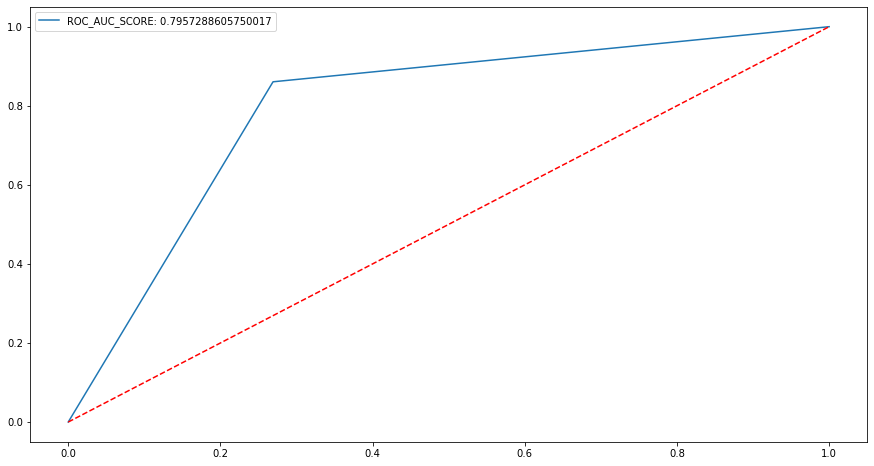

Ada Boost


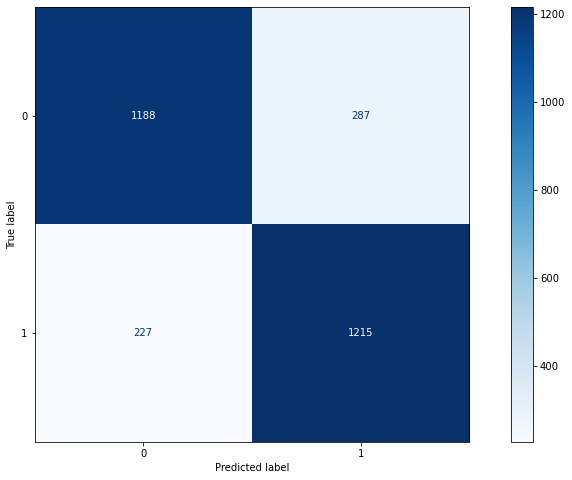

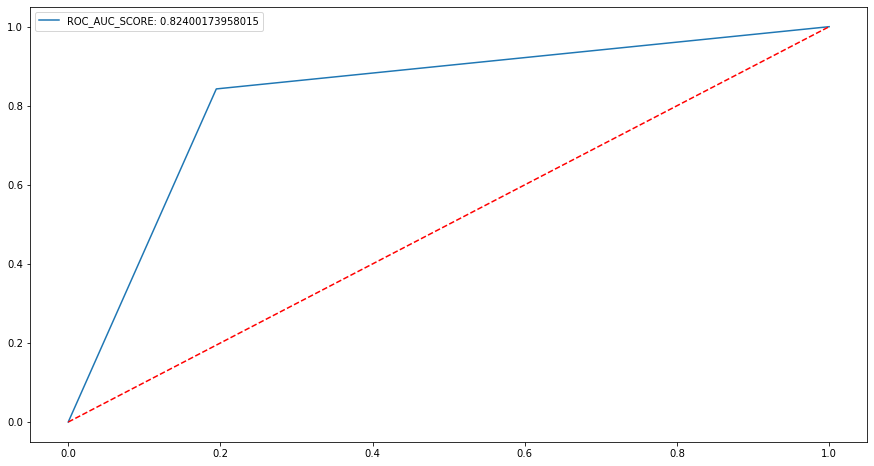

KNN


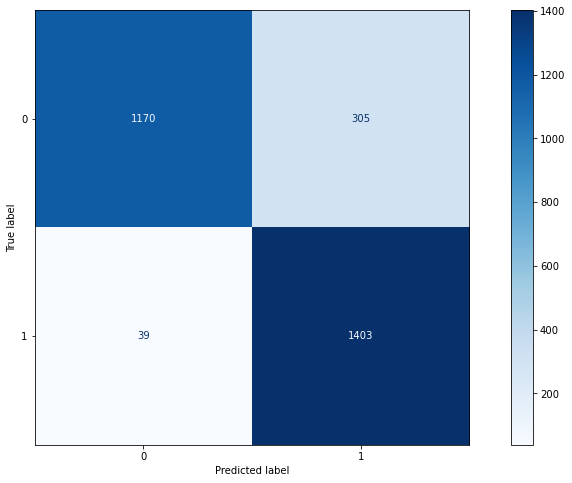

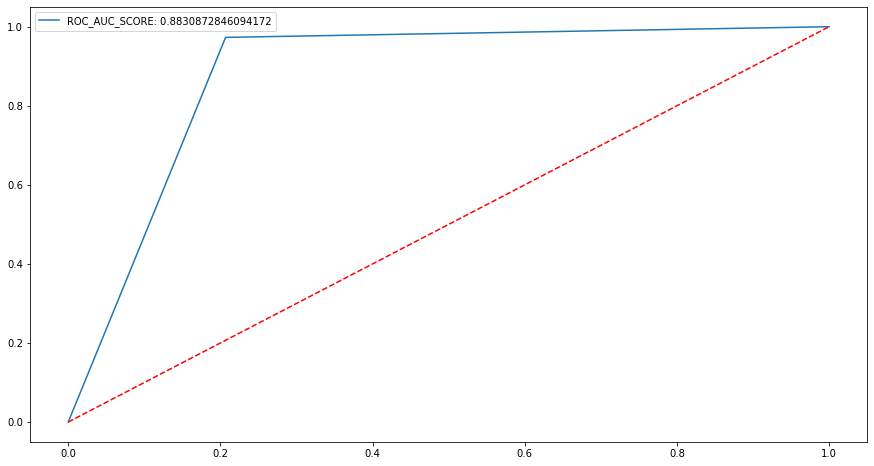

XG Boost


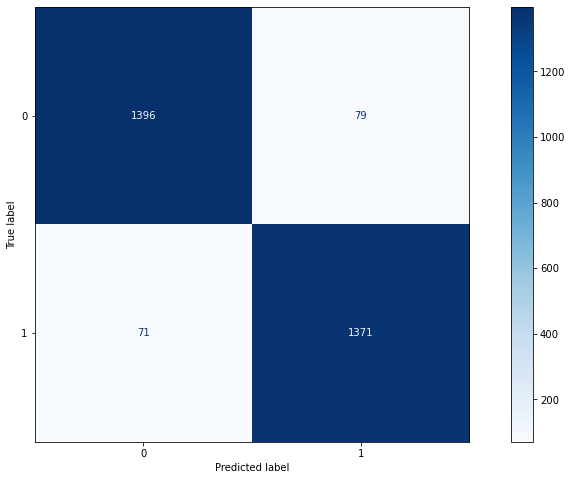

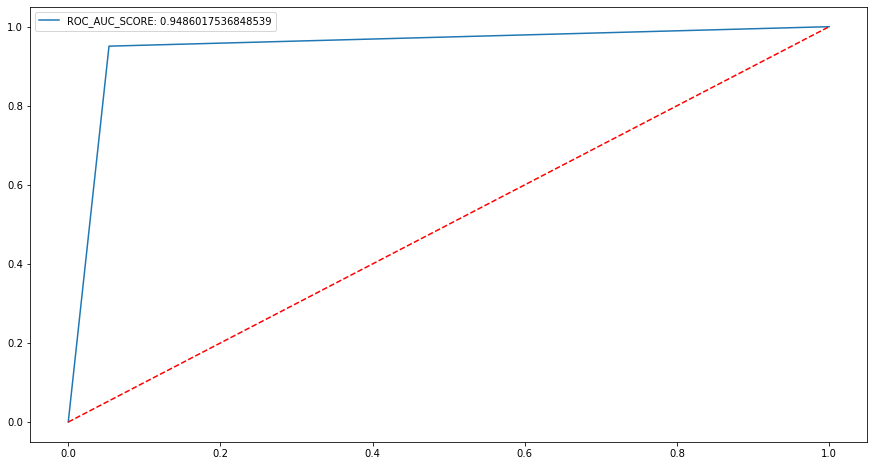

In [320]:
for clf,clf_name in list(zip(models.values(),models.keys())):
    model_classification = clf.fit(Xtrain,ytrain)
    y_pred = model_classification.predict(Xtest)
    print(clf_name)
    plot_confunsion_matrix(clf,Xtest,ytest)
    plot_roc_curve(clf,Xtest,ytest)

In [323]:
Xc = sm.add_constant(X)
X_train,X_test,y_train,y_test = train_test_split(Xc,y,test_size=0.30,random_state=10)

In [324]:
model = sm.OLS(y_train,X_train).fit()

In [325]:
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])
def update_score_card(model, cutoff):
    y_pred_prob = model.predict(X_test)
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    global score_card
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'Accuracy Score': accuracy_score(y_test, y_pred),
                                    'Kappa Score':cohen_kappa_score(y_test, y_pred),
                                    'f1-score': f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [326]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for value in cutoff:
    update_score_card(model, value)

In [327]:
print('Score Card for Logistic regression:')
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)
score_card.style.highlight_max(color = 'lightblue', subset =  ['f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.874247,0.567141,0.995839,0.622215,0.250669,0.722698
1,0.200000,0.874247,0.616017,0.986824,0.689407,0.382890,0.758529
2,0.300000,0.874247,0.673934,0.964632,0.751800,0.505920,0.793497
3,0.400000,0.874247,0.728517,0.923024,0.791909,0.585005,0.814316
4,0.500000,0.874247,0.777996,0.823856,0.796709,0.593634,0.800269
5,0.600000,0.874247,0.810273,0.678225,0.762427,0.523926,0.738392
6,0.700000,0.874247,0.852713,0.533981,0.724032,0.445675,0.656716
7,0.800000,0.874247,0.901993,0.376560,0.671580,0.338768,0.531311
8,0.900000,0.874247,0.922261,0.180999,0.587590,0.167590,0.302609


In [ ]:
# For the optimal cutoff 0.4

In [328]:
y_pred_prob = model.predict(X_test)

In [329]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)

In [330]:
logreg_df = pd.DataFrame({'tpr':tpr,
                         'fpr':fpr,
                         'threshold':threshold})

In [331]:
logreg_df['Difference'] = logreg_df['tpr'] - logreg_df['fpr']

In [333]:
logreg_df = logreg_df.sort_values(by='Difference',ascending=False).reset_index(drop=True)
logreg_df.head()

,tpr,fpr,threshold,Difference
0,0.889043,0.286780,0.445042,0.602263
1,0.888350,0.286102,0.445379,0.602248
2,0.888350,0.286780,0.445373,0.601570
3,0.886963,0.285424,0.446771,0.601539
4,0.873786,0.272542,0.459941,0.601244


Even from the Youden's Index Table the max difference 0.602263 corresponding to 0.445

In [ ]:
# threshold from both the value is coming almost same

In [335]:
y_pred = [ 0 if i < 0.4 else 1   for i in y_pred_prob]

In [336]:
metrics(y_test,y_pred,model)

The metrics for the model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000017938FD01F0>

Accuracy Score: 0.7919094960575934
Recall Score: 0.9230235783633842
Precision Score: 0.7285166940339354
F1 Score: 0.8143163046803304
Kappa Score: 0.5850051739029041

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1475
           1       0.73      0.92      0.81      1442

    accuracy                           0.79      2917
   macro avg       0.81      0.79      0.79      2917
weighted avg       0.81      0.79      0.79      2917



In [ ]:
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree Classifier': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Ada Boost': AdaBoostClassifier(),
          'KNN': KNeighborsClassifier(),
          'XG Boost': XGBClassifier()}

In [339]:
params = {'criterion':['gini','entropy'],
    'min_samples_split':np.arange(2,6),
    'min_samples_leaf':np.arange(1,6),
    'max_leaf_nodes':np.arange(2,6)} 

In [340]:
grd = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params,cv=5)
grd.fit(Xtrain,ytrain)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([2, 3, 4, 5]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'min_samples_split': array([2, 3, 4, 5])})

In [341]:
grd.best_params_

{'criterion': 'entropy',
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [343]:
decision_classification = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=5,min_samples_leaf=1,
                                                 min_samples_split=2,random_state=10)
decision_classification.fit(Xtrain,ytrain)
y_pred = decision_classification.predict(Xtest)

In [344]:
metrics(ytest,y_pred,decision_classification)

The metrics for the model: DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=10)

Accuracy Score: 0.789166952348303
Recall Score: 0.9334257975034674
Precision Score: 0.72171581769437
F1 Score: 0.814030843664953
Kappa Score: 0.579659262407685

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1475
           1       0.72      0.93      0.81      1442

    accuracy                           0.79      2917
   macro avg       0.82      0.79      0.79      2917
weighted avg       0.82      0.79      0.79      2917



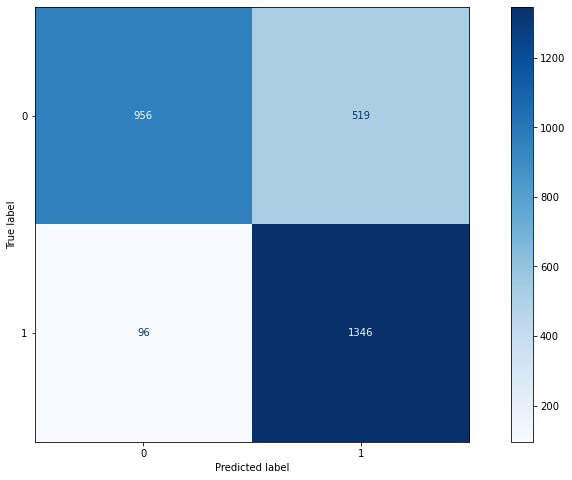

In [345]:
plot_confunsion_matrix(decision_classification,Xtest,ytest)

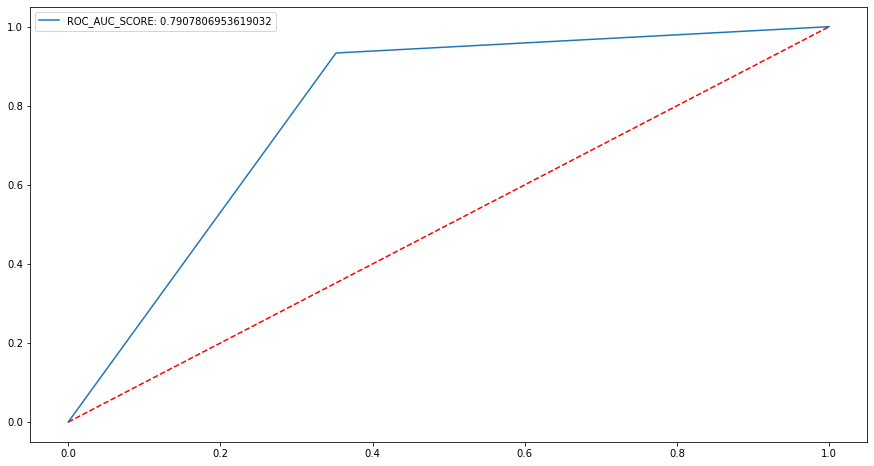

In [346]:
plot_roc_curve(decision_classification,Xtest,ytest)

In [356]:
params = {'n_estimators':[100,120,140],
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7],
    'min_samples_split':range(2,5),
    'min_samples_leaf':range(1,5),
    'max_features':['sqrt','log2'],
    'max_leaf_nodes':range(2,5)}

In [357]:
grd = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params,cv=5)
grd.fit(Xtrain,ytrain)
grd.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 120}

In [368]:
rfc = RandomForestClassifier(n_estimators=120,criterion='gini',max_depth=3,max_features='sqrt',max_leaf_nodes=4,
                             min_samples_leaf=1,min_samples_split=3,random_state=10)
rfc.fit(Xtrain,ytrain)
y_pred = rfc.predict(Xtest)

In [369]:
metrics(ytest,y_pred,rfc)

The metrics for the model: RandomForestClassifier(max_depth=3, max_leaf_nodes=4, min_samples_split=3,
                       n_estimators=120, random_state=10)

Accuracy Score: 0.7970517655125129
Recall Score: 0.871012482662968
Precision Score: 0.7557160048134778
F1 Score: 0.8092783505154639
Kappa Score: 0.5947432154624562

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1475
           1       0.76      0.87      0.81      1442

    accuracy                           0.80      2917
   macro avg       0.80      0.80      0.80      2917
weighted avg       0.80      0.80      0.80      2917



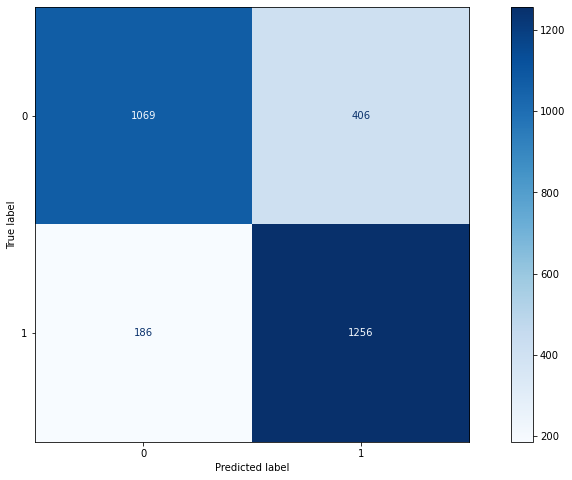

In [370]:
plot_confunsion_matrix(rfc,Xtest,ytest)

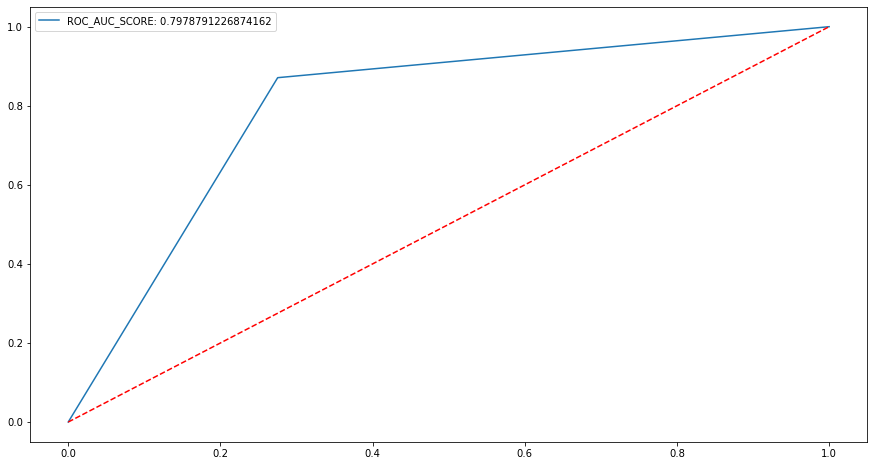

In [371]:
plot_roc_curve(rfc,Xtest,ytest)

In [366]:
params = [{'n_neighbors':[5,7,9],
         'metric':['euclidean','chebyshev','manhattan']}]

In [367]:
grd = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=5)
grd.fit(Xtrain,ytrain)
grd.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [372]:
knn = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
knn.fit(Xtrain,ytrain)
y_pred = knn.predict(Xtest)

In [373]:
metrics(ytest,y_pred,knn)

The metrics for the model: KNeighborsClassifier(metric='manhattan')

Accuracy Score: 0.8813849845731916
Recall Score: 0.9798890429958391
Precision Score: 0.8167630057803468
F1 Score: 0.890920554854981
Kappa Score: 0.763268505635403

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      1475
           1       0.82      0.98      0.89      1442

    accuracy                           0.88      2917
   macro avg       0.90      0.88      0.88      2917
weighted avg       0.90      0.88      0.88      2917



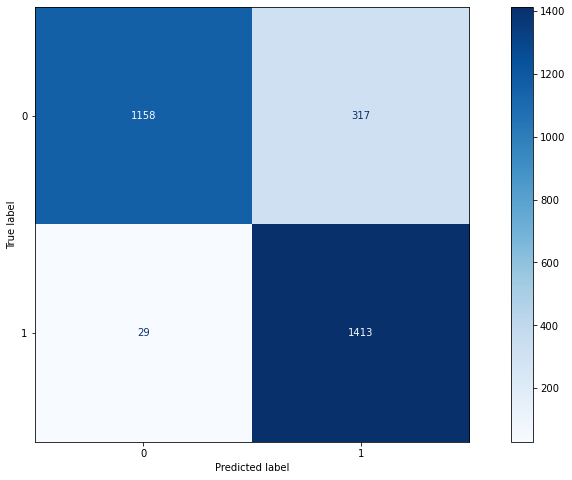

In [375]:
plot_confunsion_matrix(knn,Xtest,ytest)

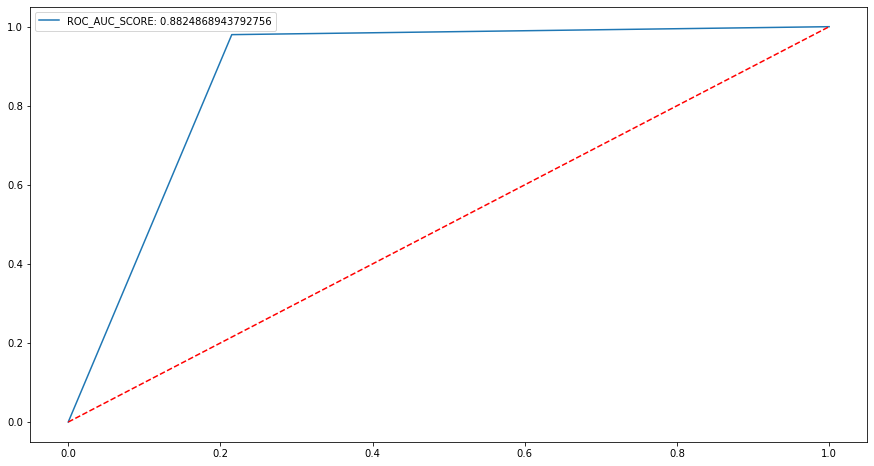

In [376]:
plot_roc_curve(knn,Xtest,ytest)